**THE SPARKS FOUNDATION**

**TASK 3: EXPLORATORY DATA ANALYSIS-RETAIL**

Objective: To perform exploratory data analysis on 'SampleSuperstore' dataset.

Author: **RHYTHM RASTOGI**

In [35]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [36]:
df = pd.read_csv('/content/SampleSuperstore.csv') #Loading the dataset
df.shape #Give dimensions of the dataset

(9994, 13)

In [37]:
df.head() #to get first 5 rows

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [38]:
df.info() # to get basic information of columns (like name,datatype, etc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [39]:
df.isnull().sum() #check for null values in the columns

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

This shows there is no null value in any column.

In [40]:
df.describe() #statistical information about column variables

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [41]:
df.duplicated().sum() # check for duplicates in the dataset 

17

In [42]:
df.drop_duplicates() #drop all the duplicates

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


**To find the correlation between variables and visualize it.**

In [43]:
corr = df.corr()
corr

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


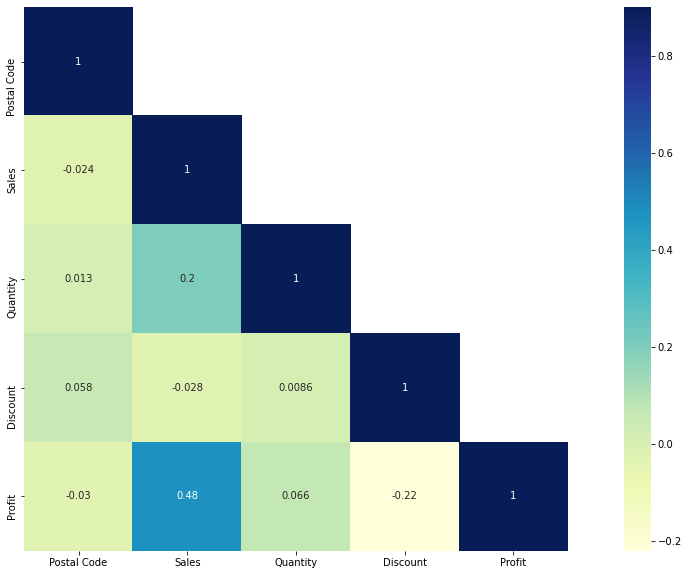

In [44]:
#visualize the correlation
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu") 

Here you can see that profit share positive relation with sales and quantity hence these two factors contribute positively towards profit.

**Find covariance of the dataset and visualize it.**

In [45]:
df.cov()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.028080e+09,-476682.766590,910.415885,386.870404,-225045.849445
Sales,-4.766828e+05,388434.455308,278.459923,-3.627228,69944.096586
Quantity,9.104159e+02,278.459923,4.951113,0.003961,34.534769
Discount,3.868704e+02,-3.627228,0.003961,0.042622,-10.615173
Profit,-2.250458e+05,69944.096586,34.534769,-10.615173,54877.798055


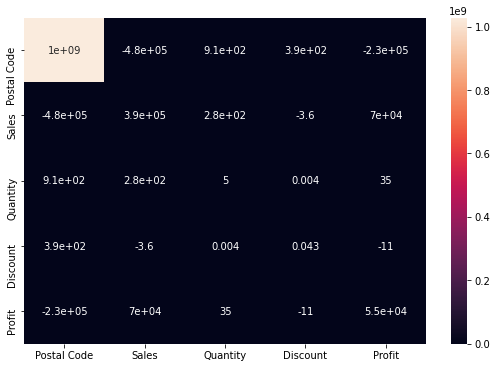

In [46]:
fig,axes = plt.subplots(1,1,figsize=(9,6))
sn.heatmap(df.cov(), annot= True)
plt.show()

**Visualization of Dataset.**

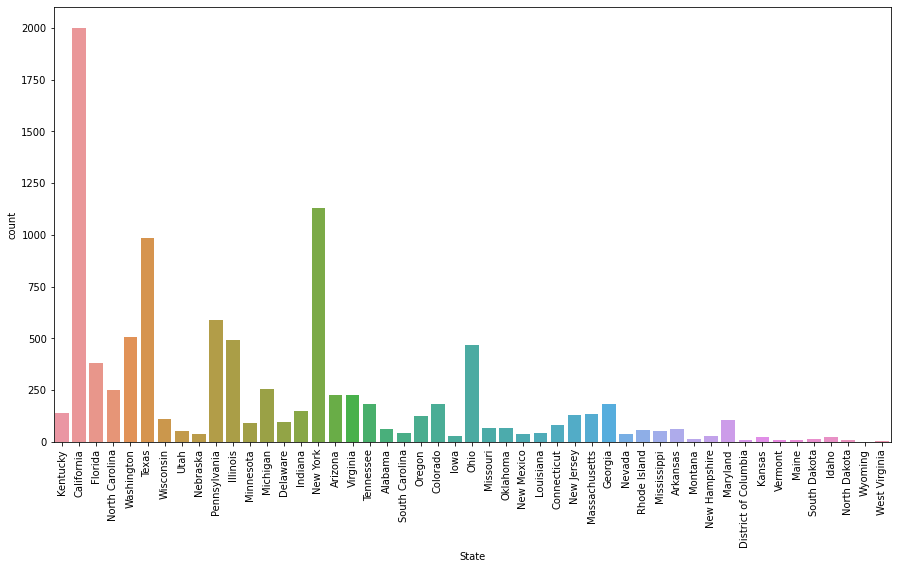

In [47]:
#Dropping the Postal code column from dataset.
col=['Postal Code']
df1=df.drop(columns=col,axis=1)

#visualize data statewise.
plt.figure(figsize=(15,8))
sn.countplot(x=df1['State'])
plt.xticks(rotation=90)
plt.show()

We can infer from the above barplot that the states - California and New York are having the highest profit while Ohio, Pennsylvania and Texas are having the highest losses or least profits(negative)

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


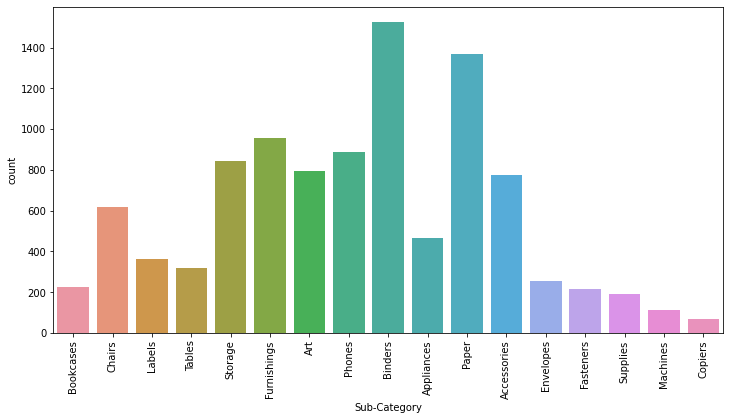

In [48]:
print(df['Sub-Category'].value_counts())
plt.figure(figsize=(12,6))
sn.countplot(x=df['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

The graph shows that Binders is the most saled sub-category followed by Paper

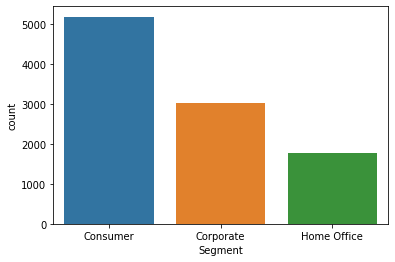

In [49]:
sn.countplot(x=df['Segment'])

According to segments, mostly sales occured with consumers then corporate Segment and lastly with home office segment.

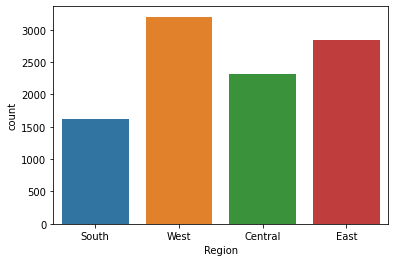

In [50]:
sn.countplot(x=df['Region'])

Western Region contributed most to the sales followed by eastern region and least by the south.

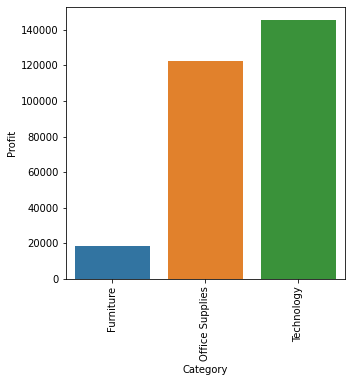

In [51]:
#Category wise profit
category_df = df.groupby("Category")["Profit"].sum()
category_df = category_df.to_frame().reset_index()

#visualize category wise profit
plt.figure(figsize = (5,5))
sn.barplot(x = category_df["Category"], y = category_df["Profit"])
plt.ylabel("Profit")
plt.xlabel("Category")
plt.xticks(rotation="vertical")
plt.show()

We can see that the profits are least for furniture.

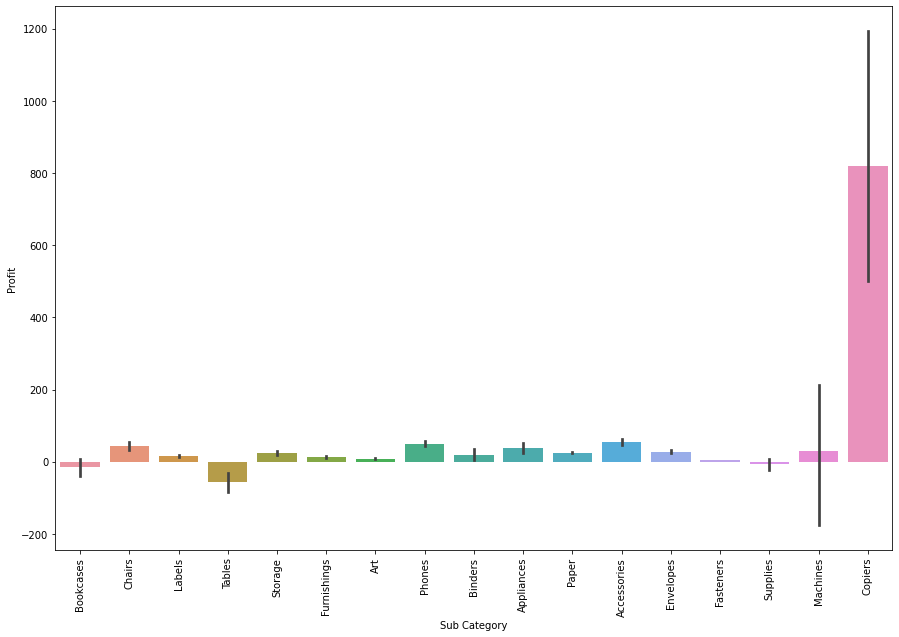

In [52]:
#visualize sub-category wise profit
plt.figure(figsize = (15,10))
sn.barplot(x = df["Sub-Category"], y = df["Profit"])
plt.ylabel("Profit")
plt.xlabel("Sub Category")
plt.xticks(rotation="vertical")
plt.show()

Copiers give most profit among all sub categories of product.

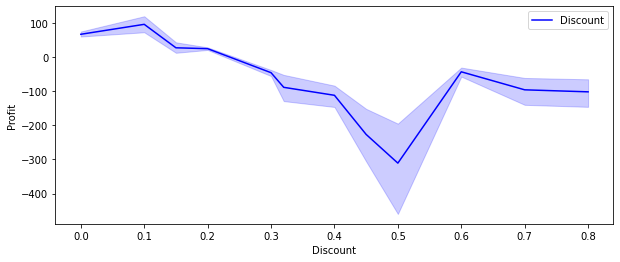

In [53]:
plt.figure(figsize = (10,4))
sn.lineplot('Discount', 'Profit', data = df, color = 'b', label= 'Discount')
plt.legend()

Profit is maximum with least discount but least with 50% discount.

**Summing the sales ,profit,discount,quantity according to every state of region and also according to sub-categories sales**

In [54]:
grouped=pd.DataFrame(df.groupby(['Ship Mode','Segment','Category','Sub-Category','State','Region'])['Quantity','Discount','Sales','Profit'].sum().reset_index())
grouped

,Ship Mode,Segment,Category,Sub-Category,State,Region,Quantity,Discount,Sales,Profit
0,First Class,Consumer,Furniture,Bookcases,Arizona,West,5,0.70,181.470,-320.5970
1,First Class,Consumer,Furniture,Bookcases,California,West,9,0.45,1809.497,243.2526
2,First Class,Consumer,Furniture,Bookcases,Colorado,West,3,0.70,89.991,-152.9847
3,First Class,Consumer,Furniture,Bookcases,Florida,South,3,0.20,314.352,-15.7176
4,First Class,Consumer,Furniture,Bookcases,Georgia,South,5,0.00,354.900,88.7250
...,...,...,...,...,...,...,...,...,...,...
2978,Standard Class,Home Office,Technology,Phones,Texas,Central,12,0.60,808.704,77.9712
2979,Standard Class,Home Office,Technology,Phones,Vermont,East,5,0.00,1294.750,336.6350
2980,Standard Class,Home Office,Technology,Phones,Virginia,South,17,0.00,365.130,58.7384
2981,Standard Class,Home Office,Technology,Phones,Washington,West,17,1.20,1989.448,63.2645


[]

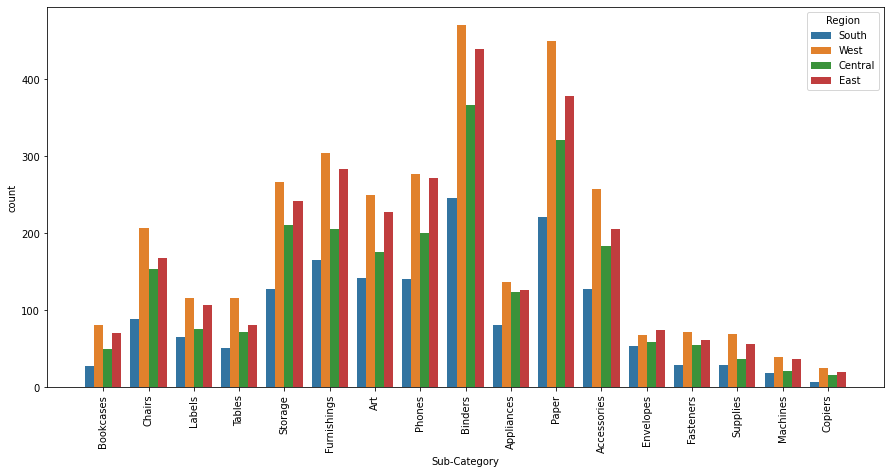

In [56]:
plt.figure(figsize=(15,7))
sn.countplot(x="Sub-Category", hue= "Region", data=df)
plt.xticks(rotation="vertical")
plt.plot()

Copiers, Machines and Supplies are the least sold products overall . South accounts for the least sales in any of the sub-categories.

In [57]:
#To find interquantile range
Q1 = df1.quantile(q = 0.25, axis = 0, numeric_only = True, interpolation = 'linear')
Q3 = df1.quantile(q = 0.75, axis = 0, numeric_only = True, interpolation = 'linear')
IQR = Q3 - Q1
print(IQR)

Sales       192.66000
Quantity      3.00000
Discount      0.20000
Profit       27.63525
dtype: float64


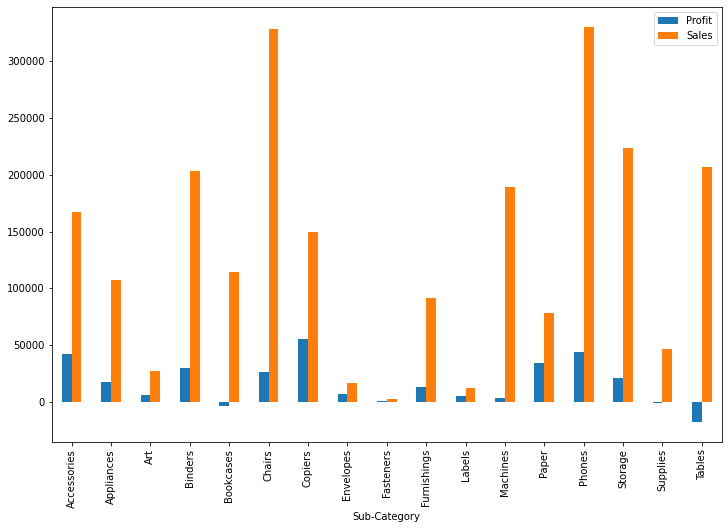

In [58]:
sub_df = df.groupby("Sub-Category")["Profit" , "Sales"].sum()
sub_df.plot(kind = "bar"  ,figsize = (12 , 8))
plt.show()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64


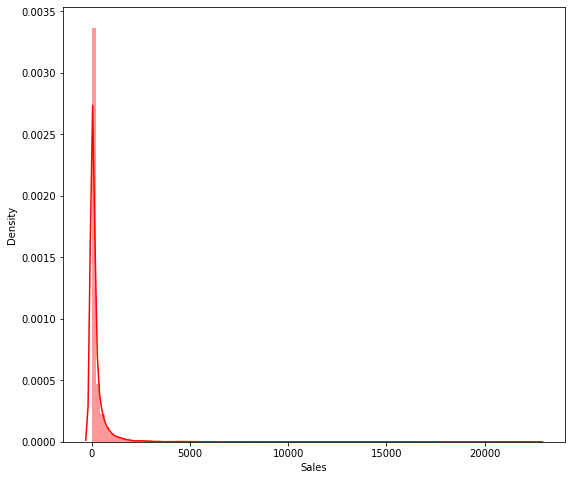

In [59]:
print(df['Sales'].describe())
plt.figure(figsize = (9 , 8))
sn.distplot(df['Sales'], color = 'r', bins = 100, hist_kws = {'alpha': 0.4});

Conclusion :

● We can conclude that our sales are higher as compared to our profit in every subcategory.

● Tables, Bookcases and Supplies are responsible for maximum losses( as they are negativewith respect to profit.)

Weak Areas :

● Though Copiers are the least sold products it makes most of the profit so, we must look for ways to improve the sales of the Copiers.

● Tables should either be removed from the market or major changes should be made to tables in order to not incur losses in future.

● We should try to improve our sales in North Dakota, South Dakota , West Virginia and Columbia using new techniques as these places show very less sales.

● Our sales at Illinois, Ohio, Texas and Pennsylvania are making losses so we must concentrate on the loss making issues in this region.

● So , in order to improve our sales and profit we must pay special attention to our losses and strengthen our weak areas.